# Challenge Set 6
# Topic: Classification Errors
# Date: 05/09/16
# Name: David Kanarek
# Worked with: other student's name

In [1]:
import pandas as pd

columns = ['Party','HC_Infants','Water_Cost_Sharing',
           'Budget_Resolution','Dr_Fee_Freeze','SLV_Aid',
           'Religious_in_Schools','Anti-Sat_Test_Ban','Aid_Contras',
           'mx-missle','immigration','synfuels_cutback','ed_spending',
           'superfund_sue','crime','duty_free', 'SA_export'
          ]

voting_data = pd.read_csv('congressional_voting_records.csv', 
                          header = None, names = columns)

mapping_dict = {'y': 1, 'n': 0, '?':'?'}
party_map = {'democrat':1,'republican':0}

for i in voting_data.columns[1:]:
    no_count = voting_data[voting_data[i]=='n'].count()['Party']
    yes_count = voting_data[voting_data[i]=='y'].count()['Party']
    mapping_dict['?']=format(yes_count/float(no_count+yes_count),'.3f')
    voting_data[i]=voting_data[i].map(mapping_dict)

voting_data['Party']=voting_data['Party'].map(party_map)
voting_data.head()

,Party,HC_Infants,Water_Cost_Sharing,Budget_Resolution,Dr_Fee_Freeze,SLV_Aid,Religious_in_Schools,Anti-Sat_Test_Ban,Aid_Contras,mx-missle,immigration,synfuels_cutback,ed_spending,superfund_sue,crime,duty_free,SA_export
0,0,0,1,0,1,1,1,0,0,0,1,0.362,1,1,1,0,1
1,0,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,0.813
2,1,0.442,1,1,0.417,1,1,0,0,0,0,1,0,1,1,0,0
3,1,0,1,1,0,0.505,1,0,0,0,0,1,0,1,0,0,1
4,1,1,1,1,0,1,1,0,0,0,0,1,0.423,1,1,1,1


## Challenge 1

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *
import numpy as np
from sklearn.cross_validation import train_test_split

classifier_list = [RandomForestClassifier(),DecisionTreeClassifier(),
                       KNeighborsClassifier(n_neighbors=3),SVC(),LogisticRegression(),GaussianNB()]

def Classifier_Acc(features,label,classifier, percent_data = 1):

    X_train, X_test, y_train, y_test = train_test_split(features, label,
                                                    test_size=0.33, random_state=42)
    model = classifier
    results = model.fit(X_train, y_train)

    acc = accuracy_score(results.predict(X_test),y_test)
    f1 = f1_score(results.predict(X_test),y_test)
    precision = precision_score(results.predict(X_test),y_test)
    recall = recall_score(results.predict(X_test),y_test)
    
    return acc, f1, precision, recall

In [3]:
acc = []
f1 = []
precision =[]
recall =[]

for i in classifier_list:
    a ,f, p, r = Classifier_Acc(voting_data[voting_data.columns[1:]],voting_data['Party'],i)
    acc.append(a) 
    f1.append(f)
    precision.append(p)
    recall.append(r)

scores_df = pd.DataFrame({'Classifier':classifier_list,'Accuracy':acc,'F1_Score':f1,'Precision':precision,
                          'Recall':recall})

scores_df

,Accuracy,Classifier,F1_Score,Precision,Recall
0,0.965278,"(DecisionTreeClassifier(class_weight=None, cri...",0.974093,0.969072,0.979167
1,0.944444,"DecisionTreeClassifier(class_weight=None, crit...",0.959596,0.979381,0.940594
2,0.951389,"KNeighborsClassifier(algorithm='auto', leaf_si...",0.964467,0.979381,0.950000
3,0.965278,"SVC(C=1.0, cache_size=200, class_weight=None, ...",0.974093,0.969072,0.979167
4,0.972222,"LogisticRegression(C=1.0, class_weight=None, d...",0.979381,0.979381,0.979381
5,0.930556,GaussianNB(),0.949495,0.969072,0.930693


## Challenge 2
* please note that the code for challenge 2 was taken and edited from the solutions that were posted

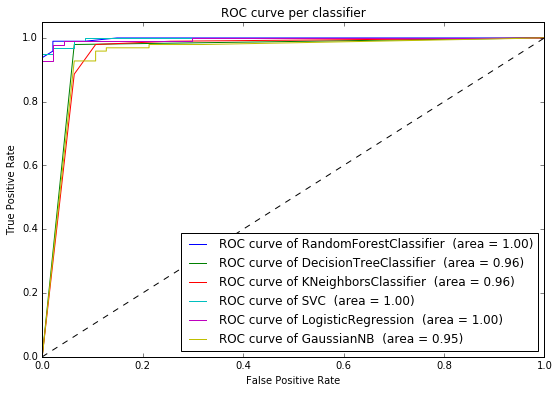

In [8]:

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import roc_curve, auc

fig = plt.figure()
fig.set_figheight(6)
fig.set_figwidth(9)
plt.subplot(1,1,1)

X_train, X_test, Y_train, Y_test = train_test_split(voting_data[voting_data.columns[1:]],voting_data['Party'],
                                                    test_size=0.33, random_state=42)
for i, alg in enumerate(classifier_list):
    alg.fit(X_train, Y_train)
    y_pred = alg.predict(X_test)

    try:
        y_score = alg.fit(X_train, Y_train).decision_function(X_test)
    except:
        y_score = (alg.fit(X_train, Y_train).predict_proba(X_test))[:,1]

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    fpr[i], tpr[i], _ = roc_curve(Y_test, y_score)
    roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot ROC curve
    alg_label = str(alg)
    alg_label = alg_label[:alg_label.index('(')]
    plt.plot(fpr[i], tpr[i], label='ROC curve of ' + alg_label+ '  (area = {1:0.2f})'.format(alg_label, roc_auc[i]))


plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve per classifier')
plt.legend(loc="lower right")

## Challenge 3

In [13]:
def Classifier_Acc(features,label,classifier, percent_data = 1):

    X_train, X_test, y_train, y_test = train_test_split(features, label,
                                                    test_size=0.33, random_state=42)
    
    acc=0
    f1=0
    precision=0
    recall=0
    splits = [0,int(len(label)/3),int(2*len(label)/3),0,int(len(label)/3),int(2*len(label)/3)]
    model = classifier
    for i in range(3):
        X_train, X_test, y_train, y_test = train_test_split(features, label,
                                                    test_size=0.33, random_state=43+i)
        results = model.fit(X_train, y_train)

        acc += accuracy_score(results.predict(X_test),y_test)
        f1 += f1_score(results.predict(X_test),y_test)
        precision += precision_score(results.predict(X_test),y_test)
        recall += recall_score(results.predict(X_test),y_test)
    
    return acc/3, f1/3, precision/3, recall/3

In [14]:
acc = []
f1 = []
precision =[]
recall =[]

for i in classifier_list:
    a ,f, p, r = Classifier_Acc(voting_data[voting_data.columns[1:]],voting_data['Party'],i)
    acc.append(a) 
    f1.append(f)
    precision.append(p)
    recall.append(r)

scores_df = pd.DataFrame({'Classifier':classifier_list,'Accuracy':acc,'F1_Score':f1,'Precision':precision,
                          'Recall':recall})

scores_df

,Accuracy,Classifier,F1_Score,Precision,Recall
0,0.962963,"(DecisionTreeClassifier(class_weight=None, cri...",0.969792,0.955720,0.984645
1,0.942130,"DecisionTreeClassifier(class_weight=None, crit...",0.953657,0.949282,0.959217
2,0.939815,"KNeighborsClassifier(algorithm='auto', leaf_si...",0.952496,0.950179,0.955436
3,0.967593,"SVC(C=1.0, cache_size=200, class_weight=None, ...",0.974205,0.963943,0.984803
4,0.974537,"LogisticRegression(C=1.0, class_weight=None, d...",0.979582,0.981676,0.977598
5,0.962963,GaussianNB(),0.970344,0.970973,0.969999
